In [1]:
import multiprocessing as mp
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import seaborn as sns
import corner

In [2]:
def _MH(S, target, init, proposal_distribution, proposal_pdf, burn=0, thin=1):
    samples = []
    current = init
    accepts = 0
    current_prob = target(current)
    for s in range(S):
        proposal = proposal_distribution(current)
        U = np.random.uniform(0, 1)
        proposal_prob = target(proposal)
        mh_prob = proposal_prob/current_prob
        if U < np.min((1, mh_prob)):
            samples.append(proposal)
            current = proposal
            current_prob = proposal_prob
            accepts += 1
        else:
            samples.append(current)
    return np.array(samples)[int(burn * S)::thin], np.array(accepts) * 1. / S

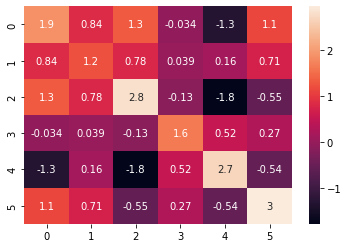

In [3]:
mu = np.array([120, 4, 1, 17, 50, 8]) # mean of the multivariate Gaussian
# Sigma = 1*np.ones((6, 6)) + 2*np.eye(6) # covariance matrix of the multivariate Gaussian
M = np.random.rand(6, 6)*2-1
Sigma = M.T @ M # covariance matrix of the multivariate Gaussian

sns.heatmap(Sigma, annot=True)
plt.show()

np.linalg.eig(Sigma)[0]

np.save("sigma.npy", Sigma)

In [4]:
# target = lambda x: sp.stats.multivariate_normal(mu, Sigma**0.5).pdf(x)
def target(x):
    return sp.stats.multivariate_normal(mu, Sigma).pdf(x)

#define the proposal distribution variance
# proposal_sigma_sq = np.array([[0.4, 0.2],[0.2, 0.4]])
proposal_sigma_sq = 0.1*np.eye(6)

#define the proposal distribution sampler
# proposal_distribution = lambda mean: sp.stats.multivariate_normal.rvs(mean, proposal_sigma_sq**0.5, size=1)
def proposal_distribution(mean): 
    return sp.stats.multivariate_normal.rvs(mean, proposal_sigma_sq, size=1)

#define the proposal distribution pdf
# proposal_pdf = lambda x, mean: sp.stats.multivariate_normal(mean, proposal_sigma_sq**0.5).pdf(x)
def proposal_pdf(x, mean):
    return sp.stats.multivariate_normal(mean, proposal_sigma_sq).pdf(x)

S=10_000
# init = [115,10, 2, 12, 45, 7]
init = mu + np.random.randn(6)*2
#run sampler 2 on target distribution 1
chain1, ar1 = _MH(S, target, init, proposal_distribution, proposal_pdf, burn=0.2, thin=20)
chain2, ar2 = _MH(S, target, init, proposal_distribution, proposal_pdf, burn=0.2, thin=20)
chain3, ar3 = _MH(S, target, init, proposal_distribution, proposal_pdf, burn=0.2, thin=20)
chain4, ar4 = _MH(S, target, init, proposal_distribution, proposal_pdf, burn=0.2, thin=20)
chain5, ar5 = _MH(S, target, init, proposal_distribution, proposal_pdf, burn=0.2, thin=20)
samples = [chain1, chain2, chain3, chain4, chain5]
accept_rates = [ar1, ar2, ar3, ar4, ar5]
print(accept_rates)

[0.0528, 0.0558, 0.0524, 0.0571, 0.0469]


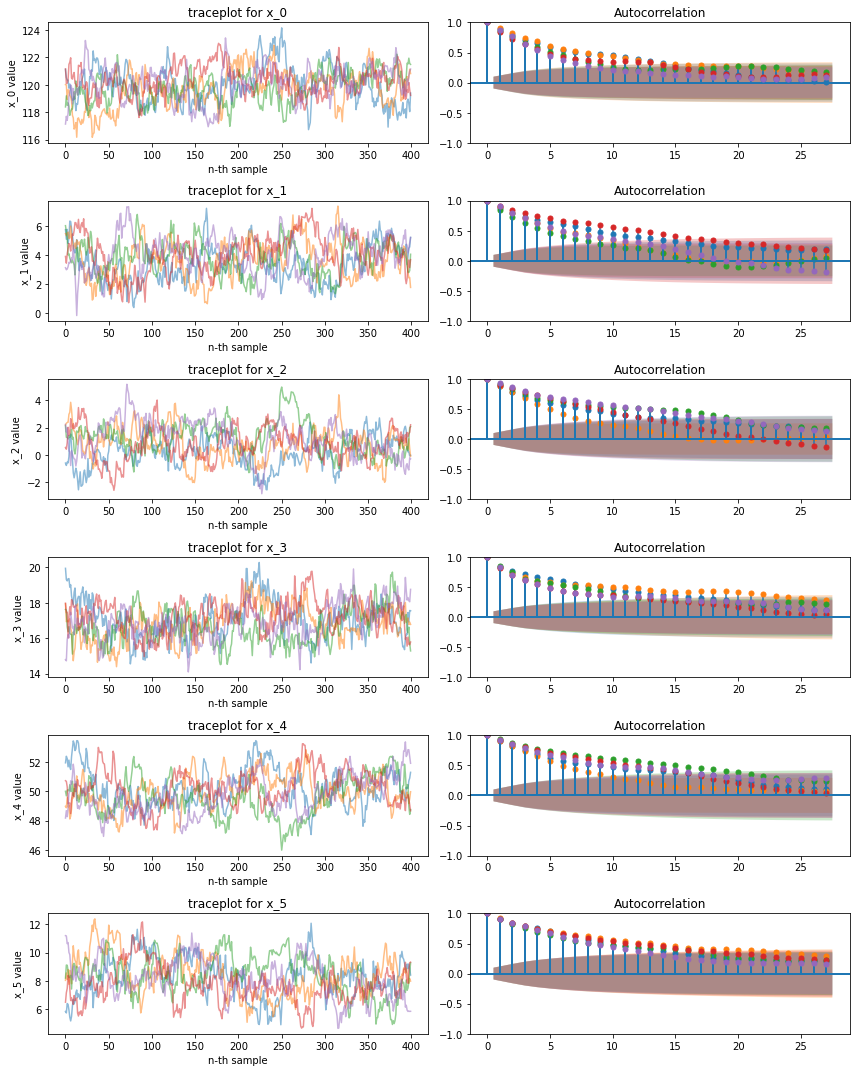

In [124]:
fig, ax = plt.subplots(6, 2, figsize=(12, 15))
for i in range(6):
    for chain in samples: 
        ax[i, 0].plot(np.arange(chain.shape[0]), chain[:, i], alpha=0.5) # plot the trace plot for x_1
        ax[i, 0].set_xlabel('n-th sample') # set x-axis label
        ax[i, 0].set_ylabel(f'x_{i} value') # set y-axis label
        ax[i, 0].set_title(f'traceplot for x_{i}') # set the title

        plot_acf(chain[:, i], ax=ax[i, 1])

plt.tight_layout() # layout the subplots nicely
plt.show() # display the figure

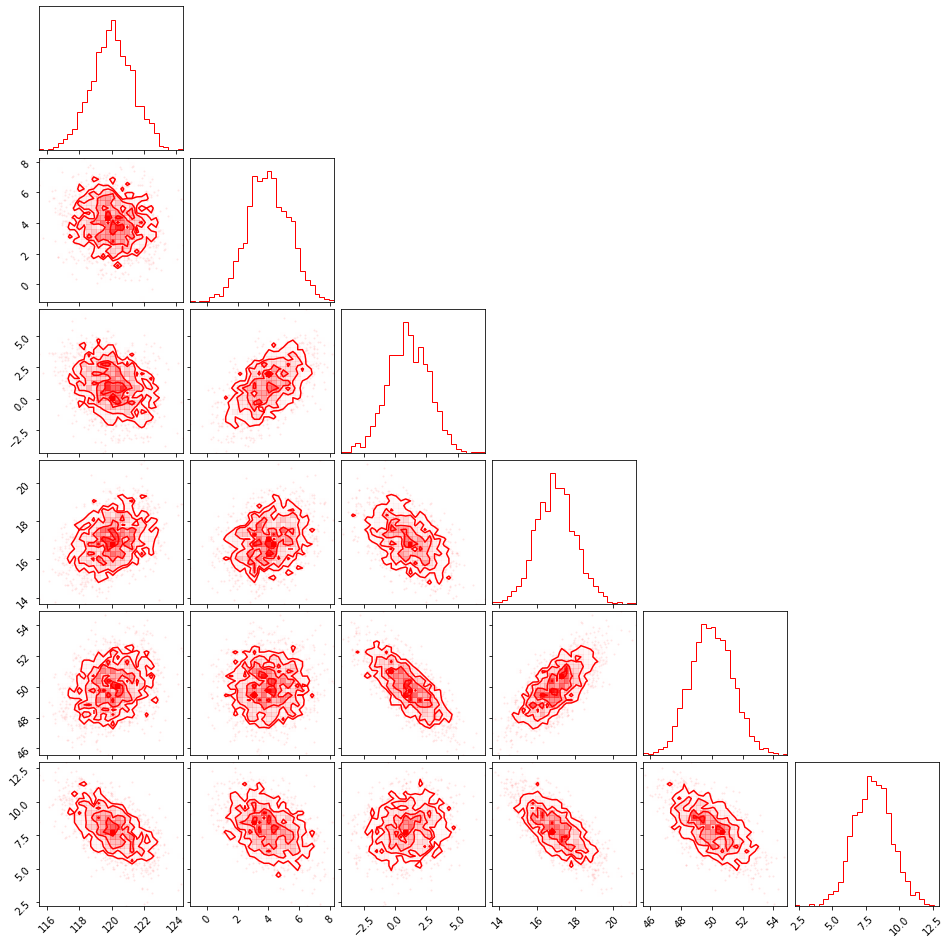

In [122]:
target_sample = sp.stats.multivariate_normal.rvs(mu, Sigma, size=2000)
fig = corner.corner(target_sample, bins=30, color="red")
corner.corner(np.vstack(samples), bins=30, fig=fig)
plt.show()

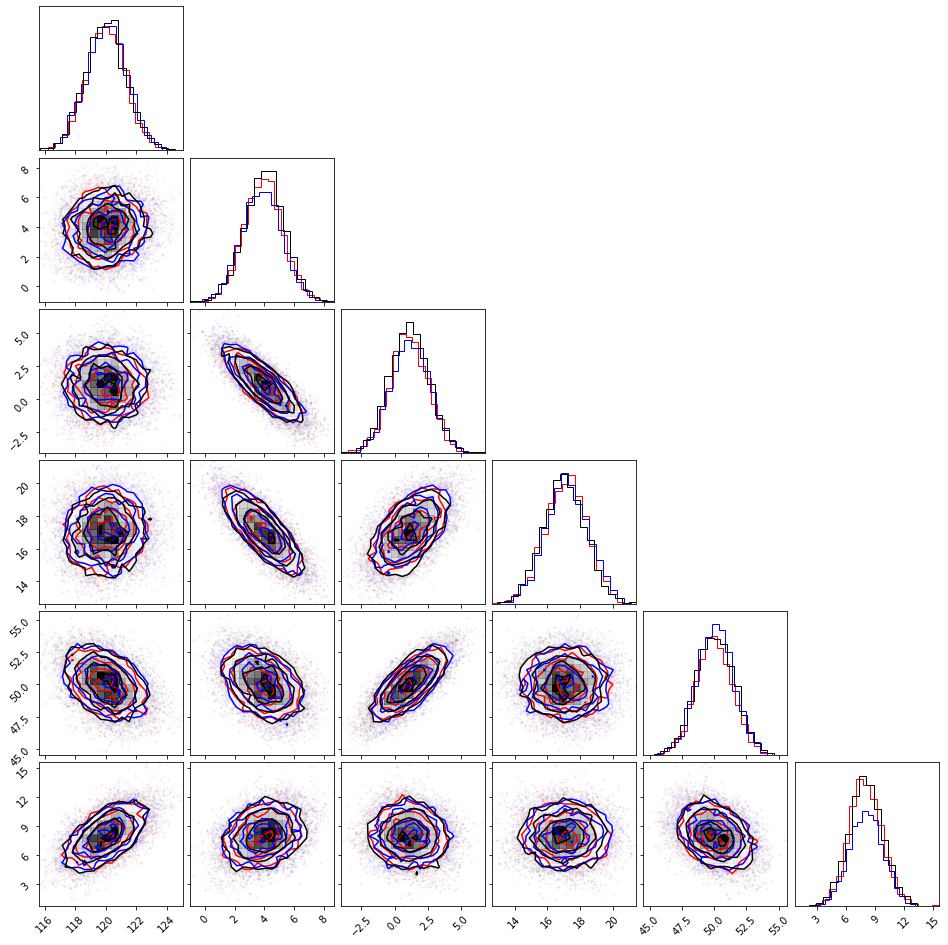

In [88]:
figure = corner.corner(samples[0], color="r")
corner.corner(samples[1], color="b", fig=figure)
corner.corner(samples[2], fig=figure)
plt.show()


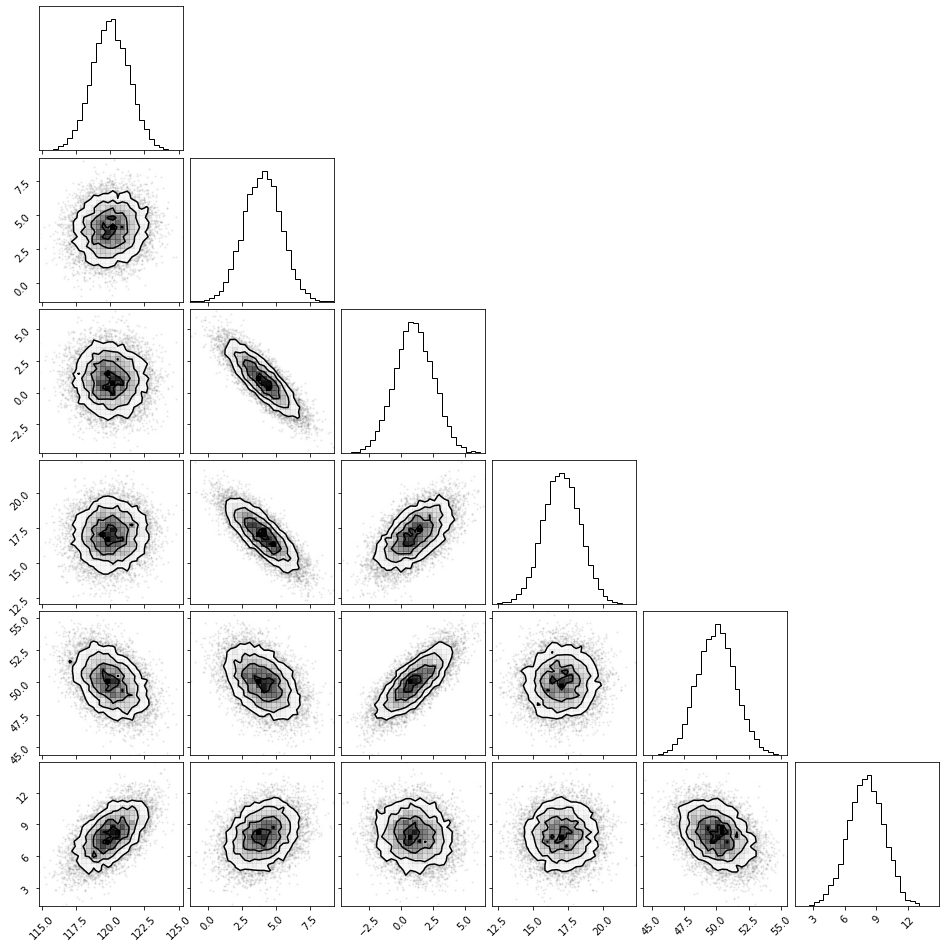

In [89]:
target_sample = sp.stats.multivariate_normal.rvs(mu, Sigma, size=10_000)
corner.corner(target_sample, bins=30)
plt.show()

In [33]:
# Testing scaling of the proposal: 
id_proposal_ars = []

for k in np.arange(0.1, 1.1, 0.1):
    print(i)
    def target(x):
        return sp.stats.multivariate_normal(mu, Sigma).pdf(x)

    #define the proposal distribution variance
    proposal_sigma_sq = k*np.eye(6)

    #define the proposal distribution sampler
    def proposal_distribution(mean): 
        return sp.stats.multivariate_normal.rvs(mean, proposal_sigma_sq, size=1)

    #define the proposal distribution pdf
    def proposal_pdf(x, mean): 
        return sp.stats.multivariate_normal(mean, proposal_sigma_sq).pdf(x)

    S=10_000
    # init = mu + np.random.randn(6)*1
    init = mu 
    chain1, ar1 = _MH(S, target, init, proposal_distribution, proposal_pdf, burn=0.2, thin=1)
    chain2, ar2 = _MH(S, target, init, proposal_distribution, proposal_pdf, burn=0.2, thin=1)
    chain3, ar3 = _MH(S, target, init, proposal_distribution, proposal_pdf, burn=0.2, thin=1)
    chain4, ar4 = _MH(S, target, init, proposal_distribution, proposal_pdf, burn=0.2, thin=1)
    chain5, ar5 = _MH(S, target, init, proposal_distribution, proposal_pdf, burn=0.2, thin=1)
    samples = [chain1, chain2, chain3, chain4, chain5]
    accept_rates = [ar1, ar2, ar3, ar4, ar5]
    # print(accept_rates)
    id_proposal_ars.append(accept_rates)

1.0
1.0
1.0


In [ ]:
sigma_proposal_ars = []

for k in np.arange(0.1, 1.1, 0.1):
    print(i)
    def target(x):
        return sp.stats.multivariate_normal(mu, Sigma).pdf(x)

    #define the proposal distribution variance
    proposal_sigma_sq = k*Sigma

    #define the proposal distribution sampler
    def proposal_distribution(mean): 
        return sp.stats.multivariate_normal.rvs(mean, proposal_sigma_sq, size=1)

    #define the proposal distribution pdf
    def proposal_pdf(x, mean): 
        return sp.stats.multivariate_normal(mean, proposal_sigma_sq).pdf(x)

    S=10_000
    # init = mu + np.random.randn(6)*1
    init = mu
    chain1, ar1 = _MH(S, target, init, proposal_distribution, proposal_pdf, burn=0.2, thin=1)
    chain2, ar2 = _MH(S, target, init, proposal_distribution, proposal_pdf, burn=0.2, thin=1)
    chain3, ar3 = _MH(S, target, init, proposal_distribution, proposal_pdf, burn=0.2, thin=1)
    chain4, ar4 = _MH(S, target, init, proposal_distribution, proposal_pdf, burn=0.2, thin=1)
    chain5, ar5 = _MH(S, target, init, proposal_distribution, proposal_pdf, burn=0.2, thin=1)
    samples = [chain1, chain2, chain3, chain4, chain5]
    accept_rates = [ar1, ar2, ar3, ar4, ar5]
    # print(accept_rates)
    sigma_proposal_ars.append(accept_rates)

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [23]:
sigma_diag_proposal_ars = []

for k in np.arange(0.1, 1.1, 0.1):
    print(i)
    def target(x):
        return sp.stats.multivariate_normal(mu, Sigma).pdf(x)

    #define the proposal distribution variance
    proposal_sigma_sq = k*np.diag(np.diag(Sigma))

    #define the proposal distribution sampler
    def proposal_distribution(mean): 
        return sp.stats.multivariate_normal.rvs(mean, proposal_sigma_sq, size=1)

    #define the proposal distribution pdf
    def proposal_pdf(x, mean): 
        return sp.stats.multivariate_normal(mean, proposal_sigma_sq).pdf(x)

    S=10_000
    init = mu + np.random.randn(6)*1
    # init = mu
    chain1, ar1 = _MH(S, target, init, proposal_distribution, proposal_pdf, burn=0.2, thin=1)
    chain2, ar2 = _MH(S, target, init, proposal_distribution, proposal_pdf, burn=0.2, thin=1)
    chain3, ar3 = _MH(S, target, init, proposal_distribution, proposal_pdf, burn=0.2, thin=1)
    chain4, ar4 = _MH(S, target, init, proposal_distribution, proposal_pdf, burn=0.2, thin=1)
    chain5, ar5 = _MH(S, target, init, proposal_distribution, proposal_pdf, burn=0.2, thin=1)
    samples = [chain1, chain2, chain3, chain4, chain5]
    accept_rates = [ar1, ar2, ar3, ar4, ar5]
    # print(accept_rates)
    sigma_diag_proposal_ars.append(accept_rates)

1.0
1.0
1.0


<ipython-input-2-976e0391442d>:10: RuntimeWarning: divide by zero encountered in double_scalars
  mh_prob = proposal_prob/current_prob
<ipython-input-2-976e0391442d>:10: RuntimeWarning: invalid value encountered in double_scalars
  mh_prob = proposal_prob/current_prob


1.0


<ipython-input-2-976e0391442d>:10: RuntimeWarning: overflow encountered in double_scalars
  mh_prob = proposal_prob/current_prob


1.0
1.0
1.0
1.0
1.0
1.0


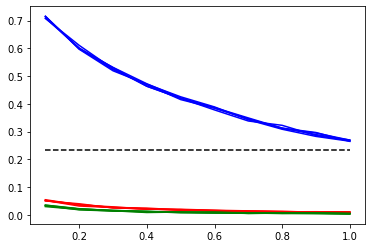

In [26]:
plt.plot(np.arange(0.1, 1.1, 0.1), id_proposal_ars, "r", label="Id")
plt.plot(np.arange(0.1, 1.1, 0.1), sigma_proposal_ars, "b", label="Sigma")
plt.plot(np.arange(0.1, 1.1, 0.1), sigma_diag_proposal_ars, "g", label="Diag Sigma")
plt.hlines(0.234, 0.1, 1.0, colors="k", ls="--")
# plt.legend()
plt.show()

In [19]:
print(Sigma)
print(np.diag(np.diag(Sigma)))

[[ 1.86614889  0.84192819  1.31464089 -0.03406576 -1.31349038  1.13540366]
 [ 0.84192819  1.23386916  0.78467583  0.0391947   0.15658257  0.71072094]
 [ 1.31464089  0.78467583  2.81731625 -0.12956228 -1.76636721 -0.55065624]
 [-0.03406576  0.0391947  -0.12956228  1.62537147  0.52425825  0.267591  ]
 [-1.31349038  0.15658257 -1.76636721  0.52425825  2.68735626 -0.5430236 ]
 [ 1.13540366  0.71072094 -0.55065624  0.267591   -0.5430236   2.95160983]]
[[1.86614889 0.         0.         0.         0.         0.        ]
 [0.         1.23386916 0.         0.         0.         0.        ]
 [0.         0.         2.81731625 0.         0.         0.        ]
 [0.         0.         0.         1.62537147 0.         0.        ]
 [0.         0.         0.         0.         2.68735626 0.        ]
 [0.         0.         0.         0.         0.         2.95160983]]


In [28]:
np.vstack(samples).shape

(2000, 6)

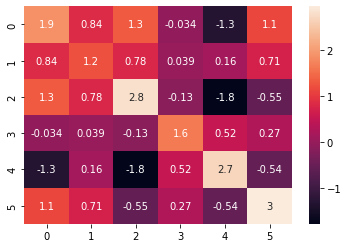

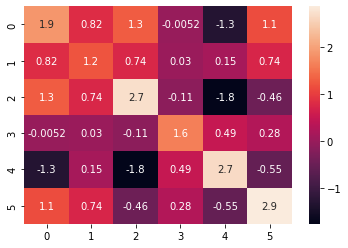

In [32]:
sns.heatmap(Sigma, annot=True)
plt.show()

sns.heatmap(np.cov(np.vstack(samples).T), annot=True)
plt.show()

In [31]:
np.cov(np.vstack(samples).T)

array([[ 1.8625196 ,  0.82282056,  1.29763258, -0.00519571, -1.31364354,
         1.14113068],
       [ 0.82282056,  1.21155697,  0.74475558,  0.03044973,  0.15407272,
         0.7353063 ],
       [ 1.29763258,  0.74475558,  2.71422947, -0.11380372, -1.76001817,
        -0.46045754],
       [-0.00519571,  0.03044973, -0.11380372,  1.63795493,  0.48652144,
         0.28193338],
       [-1.31364354,  0.15407272, -1.76001817,  0.48652144,  2.66992412,
        -0.55136104],
       [ 1.14113068,  0.7353063 , -0.46045754,  0.28193338, -0.55136104,
         2.87441843]])